# 一、导入相关包

Tensorflow版本：2.3.0
 keras版本：2.4.0
 Python版本：3.8

In [179]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow.keras as keras
#导入相关库
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime
import tensorflow.keras as keras
import  platform 
import  matplotlib.pyplot  as  plt 
import  matplotlib.image  as  mpimg 
from  IPython.display  import  Image
import pandas as pd
tf.keras.backend.clear_session()
#查看版本 是否导入成功
print(tf.__version__)
print(tf.keras.__version__)
datetime.now()

2.3.0
2.4.0


datetime.datetime(2022, 11, 20, 19, 44, 38, 557174)

# 二、加载keras内置的fashion mnist数据库

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# 读取train，test数据集
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

## 对fashion mnist数据库进行介绍

### 1.数据库内容：

Fashion-MNIST数据集包含了10个类别的图像，分别是：t-shirt（T恤），trouser（牛仔裤），pullover（套衫），dress（裙子），coat（外套），sandal（凉鞋），shirt（衬衫），sneaker（运动鞋），bag（包），ankle boot（短靴）。

### 2.数据量

In [4]:
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


### 3.数据及标签的具体形式

0-T恤（t-shirt）、1-牛仔裤（trouser）、2-套衫（pullover）、3-裙子（dress）、4-外套（coat）、5-凉鞋（sandal）、6-衬衫（shirt）、7-运动鞋（sneaker）、8-包（bag）、9-短靴（ankle boot）。

### 4.用代码将随机数据样本及对应标签（一个以上）显示出来

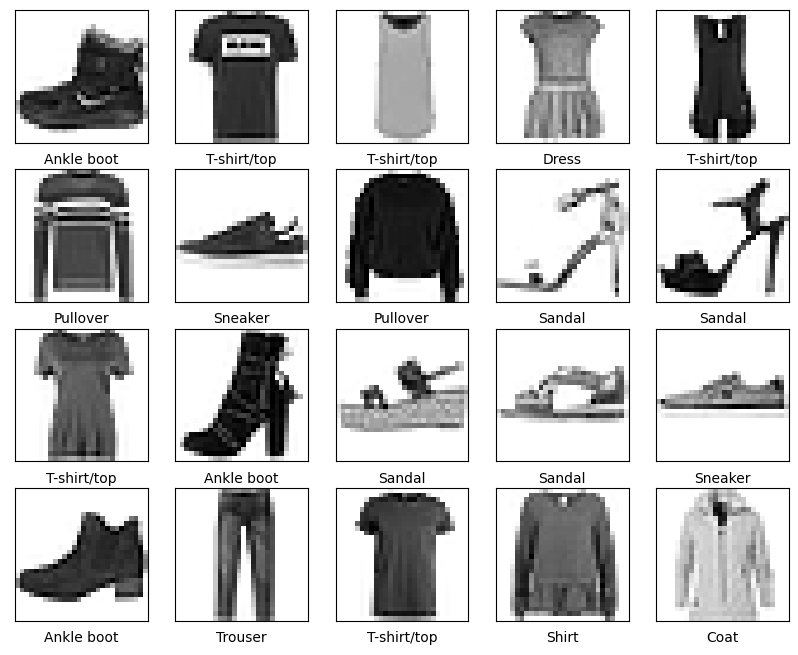

In [3]:
tf.keras.layers.Flatten()
#数据的灰度值为（0,255）
x_train.min(),x_train.max()
#数据标签为0-9的数字
x_test.min(),x_test.max()
#对应标签0-9

class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']
x_tr=x_train/255.0
x_te=x_test/255.0
plt.figure(figsize=(10,10))
# 显示训练集的30张图像
for i in range(20):
    # 创建分布6*5的图形
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # 显示照片，以cm 为单位。
    plt.imshow(x_tr[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

### 数据处理归一化

In [3]:
x_train = x_train.reshape(x_train.shape[0],28, 28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28, 28,1).astype('float32')/255

# 三、自己搭建任意神经网络，并自选损失函数和优化方法

## 首先展示未使用防止过拟合的任何手段

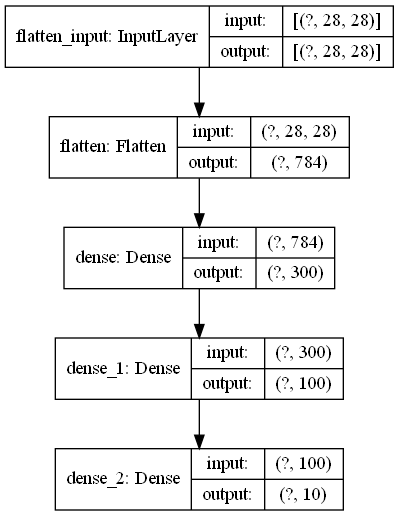

In [184]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))  # 输入层，将输入图片展平
model.add(keras.layers.Dense(300, activation="relu"))  # 全连接层，300个节点，激活函数为 relu
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10,
                             activation="softmax"))  # 输出，10类分类，激活函数为 softmax

# 计算目标函数，loss="sparse_categorical_crossentropy"，因为y是index，要转化成长度为10的一维向量所以要sparse_
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",  # 随机梯度下降
    metrics=["accuracy"]) 
keras.utils.plot_model(model, 'model_info.png', show_shapes=True)#显示网络结构

In [185]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test)) 

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4766 - accuracy: 0.8282 - val_loss: 0.4044 - val_accuracy: 0.8530
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3576 - accuracy: 0.8686 - val_loss: 0.3716 - val_accuracy: 0.8646
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3234 - accuracy: 0.8804 - val_loss: 0.3811 - val_accuracy: 0.8657
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2998 - accuracy: 0.8881 - val_loss: 0.3721 - val_accuracy: 0.8610
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.8936 - val_loss: 0.3448 - val_accuracy: 0.8770
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.8997 - val_loss: 0.3361 - val_accuracy: 0.8790
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2553 - accuracy: 0.9036 - val_loss: 0.3371 - val_accuracy:

## 训练和评估的准确率以及损失函数，以图表形式显示

### 由以下两图可知存在过拟合现象通过观测训练集和验证集的loss变化判断：随着epoch或step的增加，训练集loss不断下降，而验证集loss先下降后抬升,存在过拟合现象

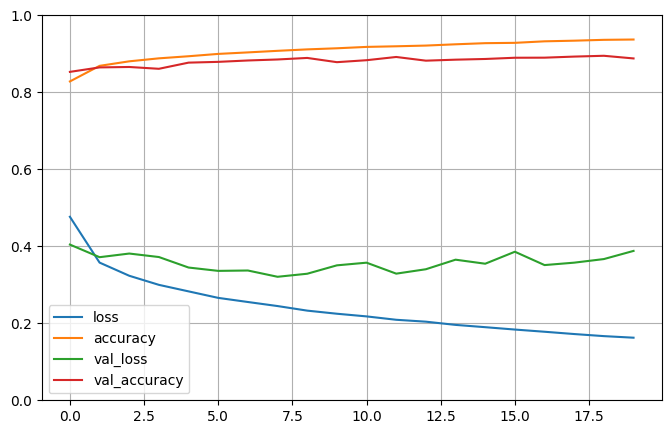

In [186]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

### 使用evaluate方法对测试集进行测试，未使用过拟合手段准确率是0.8879

In [188]:
result = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 653us/step - loss: 0.3880 - accuracy: 0.8879


## 展示使用dropout防止过拟合

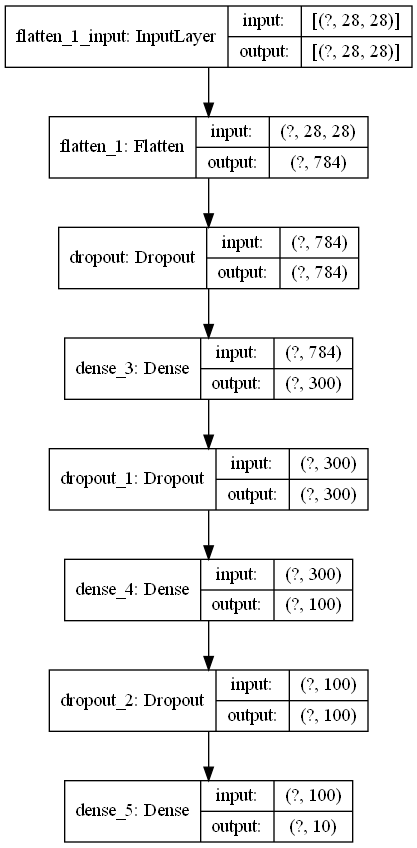

In [189]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))# 输入层，将输入图片展平
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(300, activation="relu")) # 全连接层，300个节点，激活函数为 relu
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,
                             activation="softmax"))  # 输出，10类分类，激活函数为 softmax

# 计算目标函数，loss="sparse_categorical_crossentropy"，因为y是index，要转化成长度为10的一维向量所以要sparse_
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",  # 随机梯度下降
    metrics=["accuracy"]) 
keras.utils.plot_model(model, 'model_info.png', show_shapes=True)#显示网络结构

In [190]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test)) 

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5714 - accuracy: 0.7938 - val_loss: 0.4370 - val_accuracy: 0.8372
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4404 - accuracy: 0.8380 - val_loss: 0.4111 - val_accuracy: 0.8497
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4097 - accuracy: 0.8494 - val_loss: 0.3764 - val_accuracy: 0.8616
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3884 - accuracy: 0.8554 - val_loss: 0.3793 - val_accuracy: 0.8644
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3771 - accuracy: 0.8609 - val_loss: 0.3509 - val_accuracy: 0.8684
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3629 - accuracy: 0.8652 - val_loss: 0.3436 - val_accuracy: 0.8686
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3557 - accuracy: 0.8681 - val_loss: 0.3601 - val_accuracy:

## 训练和评估的准确率以及损失函数，以图表形式显示

## 由下图可知过拟合现象得到有效缓解

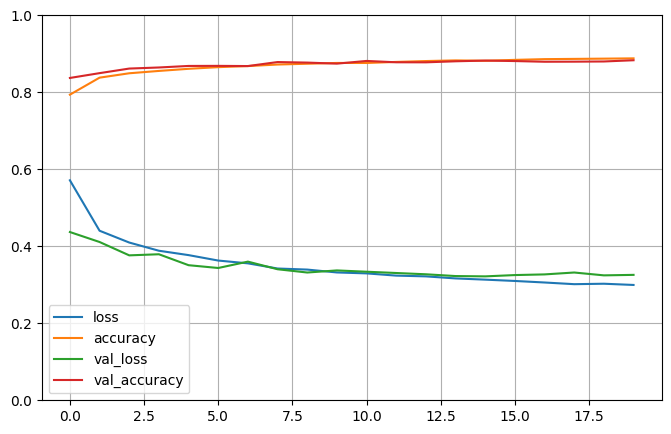

In [191]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

### 使用evaluate方法对测试集进行测试，使用dropout防止过拟合准确率上升为0.8892

In [193]:
history = model.fit(x_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2946 - accuracy: 0.8892


# 冲榜模型 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 64)       

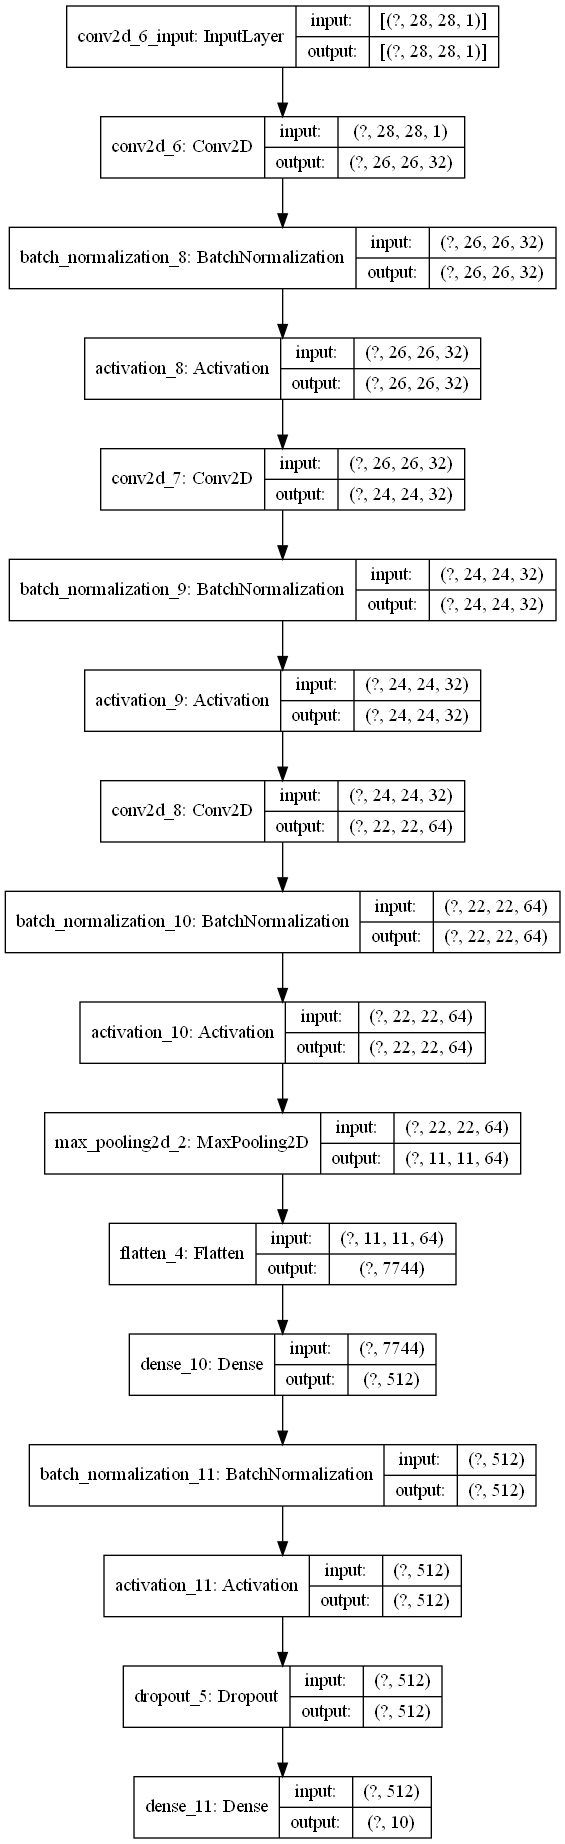

In [206]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, 'model_info.png', show_shapes=True)#显示网络结构

In [208]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 155s 83ms/step - loss: 0.2914 - accuracy: 0.8945
Epoch 2/30
1875/1875 [==============================] - 156s 83ms/step - loss: 0.2086 - accuracy: 0.9241
Epoch 3/30
1875/1875 [==============================] - 155s 82ms/step - loss: 0.1589 - accuracy: 0.9411
Epoch 4/30
1875/1875 [==============================] - 155s 83ms/step - loss: 0.1194 - accuracy: 0.9555
Epoch 5/30
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0889 - accuracy: 0.9678
Epoch 6/30
1875/1875 [==============================] - 155s 82ms/step - loss: 0.0637 - accuracy: 0.9776
Epoch 7/30
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0518 - accuracy: 0.9811
Epoch 8/30
1875/1875 [==============================] - 155s 82ms/step - loss: 0.0424 - accuracy: 0.9848
Epoch 9/30
1875/1875 [==============================] - 170s 90ms/step - loss: 0.0332 - accuracy: 0.9886
Epoch 10/30
1875/1875 [==============================] 

## 冲榜准确率为0.9341

In [211]:
result = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.4230 - accuracy: 0.9341
